In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
rho = 10
k = 10
delta = 12
S = 20
R = 20
D = 1
r = [S, R, D]
EC_50 = 30
K_el = 0.6
# parameter values
dt = 1           # length of administration for a single dose
tdose = 12       # time between doses
Udose = 100      # mg
t_span = [0, 48]


# function defintion 
def u(t):
    return Udose/dt if t % tdose <= dt else 0



def function(t, r):
    S = r[0]
    R = r[1]
    D = r[2]
    dDdt = u(t) -K_el * D
    dSdt = (1-(dDdt/(dDdt + EC_50))*rho*(1-(S + R)/k)) - delta*S
    dRdt = rho*R*(1- (S + R)/k) - delta*R
    
    
    return dSdt, dRdt, dDdt

sol = solve_ivp(function, t_span = t_span, y0 = [2, 2, 2], t_eval= np.linspace(0, 48, 100))

t = sol.t
S = sol.y[0]
R = sol.y[1]
D = sol.y[2]


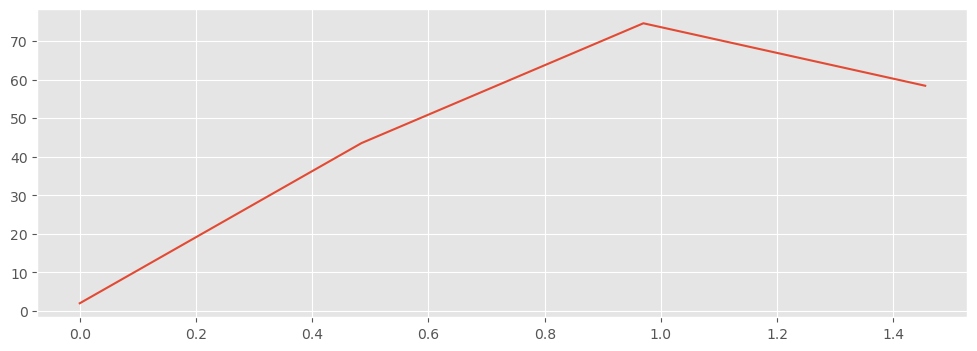

In [8]:
plt.plot(t, D)

([<matplotlib.axis.XTick at 0x1e7a2646050>,
 [Text(0, 0, '0'),
  Text(6, 0, '6'),
  Text(12, 0, '12'),
  Text(18, 0, '18'),
  Text(24, 0, '24'),
  Text(30, 0, '30'),
  Text(36, 0, '36'),
  Text(42, 0, '42'),
  Text(48, 0, '48')])

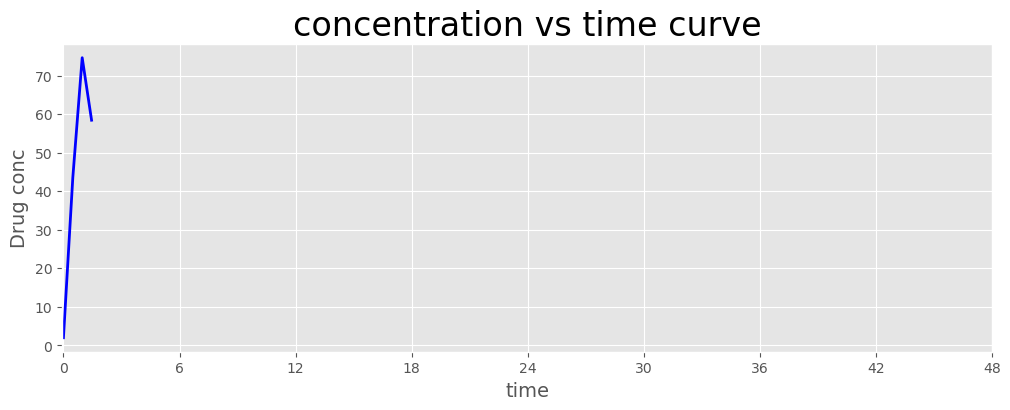

In [6]:
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,4)
fig, ax=plt.subplots()
ax.plot(t, D, lw=2, color='blue')
ax.set_xlabel("time", fontsize=14)
ax.set_ylabel('Drug conc', fontsize=14)
ax.set_title("concentration vs time curve", fontsize=24)
plt.xticks(np.arange(0, 50, step=6)) 


([<matplotlib.axis.XTick at 0x1fd426a03d0>,
 [Text(0, 0, '0'),
  Text(6, 0, '6'),
  Text(12, 0, '12'),
  Text(18, 0, '18'),
  Text(24, 0, '24'),
  Text(30, 0, '30'),
  Text(36, 0, '36'),
  Text(42, 0, '42'),
  Text(48, 0, '48')])

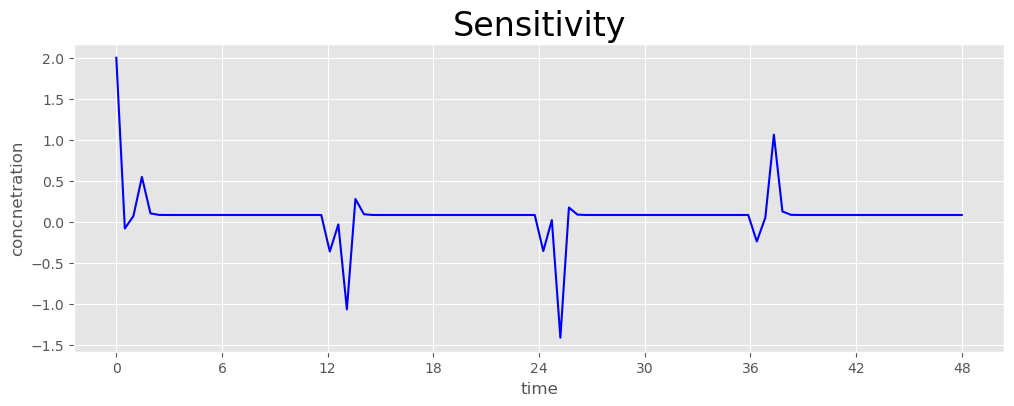

In [78]:
plt.style.use('ggplot')
fig, ax=plt.subplots()
ax.plot(t, S, color='blue')
ax.set_xlabel('time')
ax.set_ylabel('concnetration')
ax.set_title('Sensitivity', fontsize=24)
plt.xticks(np.arange(0, 50, step=6)) 

([<matplotlib.axis.XTick at 0x1fd42724d90>,
 [Text(0, 0, '0'),
  Text(6, 0, '6'),
  Text(12, 0, '12'),
  Text(18, 0, '18'),
  Text(24, 0, '24'),
  Text(30, 0, '30'),
  Text(36, 0, '36'),
  Text(42, 0, '42'),
  Text(48, 0, '48')])

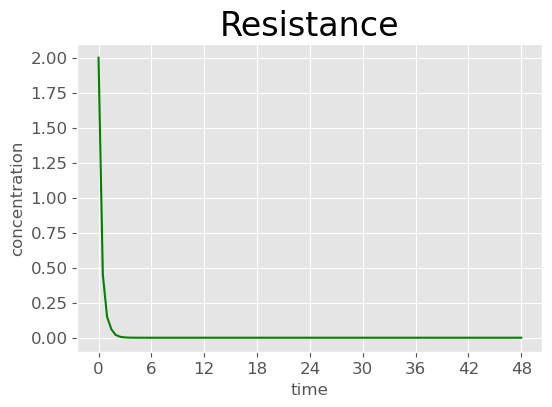

In [80]:
plt.rcParams['figure.figsize'] = (6,4)
fig, ax=plt.subplots()
ax.plot(t, R, color='green')
ax.set_title('Resistance', fontsize=24)
ax.set_xlabel('time')
ax.set_ylabel('concentration')

ax.tick_params(axis='both', labelsize=12)
plt.xticks(np.arange(0, 50, step=6)) 


([<matplotlib.axis.XTick at 0x1fd3f724950>,
 [Text(0, 0, '0'),
  Text(12, 0, '12'),
  Text(24, 0, '24'),
  Text(36, 0, '36'),
  Text(48, 0, '48'),
  Text(60, 0, '60'),
  Text(72, 0, '72'),
  Text(84, 0, '84'),
  Text(96, 0, '96')])

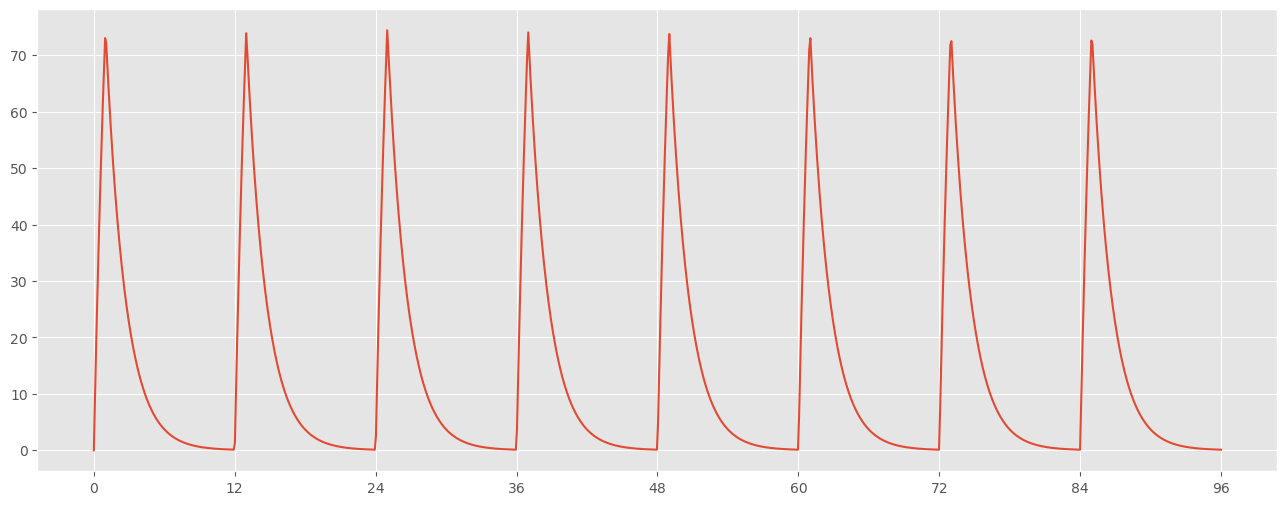

In [26]:
#Dosing Model- drug given every 12 hours
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def u(t):
    return 0

def deriv(t, C):
    return u(t) - 0.6*C

# parameter values
dt = 1           # length of administration for a single dose
tdose = 12       # time between doses
Udose = 100      # mg

# function defintion 
def u(t):
    return Udose/dt if t % tdose <= dt else 0

# specify time span and evaluation points
t_span = [0, 96]
t_eval = np.linspace(0, 96, 1000)

# initial conditions
C_initial = 0
IC = [C_initial]

# compute solution
soln = solve_ivp(deriv, t_span, IC, t_eval=t_eval, max_step=0.1)

fig, ax = plt.subplots(figsize=(16,6))#width size, height 
ax.plot(soln.t, soln.y[0])
plt.xticks(np.arange(0, 100, step=12)) 
